In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy as sc
import math

plots_dir = 'S:\\lab_winter\\martin\\MED14_PRO-seq_final\\plots\\' # directory for output plots

In [2]:
#############################################
#### load in coverages for pausing-index ####
#############################################
## first DMSO
DMSO_TSS_cov = pd.read_csv("S:\\lab_winter\\martin\\MED14_PRO-seq_final\\results\\MJ-19-14_DMSO_1h_merged\\refGene_coverage\\MJ-19-14_DMSO_1h_merged_TSSwindow_expressed_norm.cov", header=None, names=["chr", "start", "end", "gene_name", "RefSeq_ID", "strand", "norm_TSS_reads", "num_bases_covered", "annotation_length", "fraction_bases_covered"], index_col=3, sep="\t")
DMSO_genebody_cov = pd.read_csv("S:\\lab_winter\\martin\\MED14_PRO-seq_final\\results\\MJ-19-14_DMSO_1h_merged\\refGene_coverage\\MJ-19-14_DMSO_1h_merged_genebody_expressed_norm.cov", header=None, names=["chr", "start", "end", "gene_name", "RefSeq_ID", "strand", "norm_genebody_reads", "num_bases_covered", "annotation_length", "fraction_bases_covered"], index_col=3, sep="\t")
DMSO_TSS_cov['norm_TSS_RPKM'] = DMSO_TSS_cov.norm_TSS_reads/(DMSO_TSS_cov.annotation_length/1000)
DMSO_genebody_cov['norm_genebody_RPKM'] = DMSO_genebody_cov.norm_genebody_reads/(DMSO_genebody_cov.annotation_length/1000)

PI_DMSO_df = DMSO_TSS_cov[["start", "end", "RefSeq_ID", "strand", "norm_TSS_reads", "norm_TSS_RPKM"]]
PI_DMSO_df = PI_DMSO_df.join(DMSO_genebody_cov.iloc[:,[5,9]])

PI_DMSO_df = PI_DMSO_df[PI_DMSO_df.norm_TSS_reads > float(PI_DMSO_df.norm_TSS_reads.quantile(q=0.1))]
PI_DMSO_df = PI_DMSO_df[PI_DMSO_df.norm_genebody_reads > float(PI_DMSO_df.norm_genebody_reads.quantile(q=0.1))]

PI_DMSO_df["pausing_index_DMSO"] = PI_DMSO_df.norm_TSS_RPKM / PI_DMSO_df.norm_genebody_RPKM

## now 1h dTAG7
dTAG_TSS_cov = pd.read_csv("S:\\lab_winter\\martin\\MED14_PRO-seq_final\\results\\MJ-19-14_dTAG7_1h_merged\\refGene_coverage\\MJ-19-14_dTAG7_1h_merged_TSSwindow_expressed_norm.cov", header=None, names=["chr", "start", "end", "gene_name", "RefSeq_ID", "strand", "norm_TSS_reads", "num_bases_covered", "annotation_length", "fraction_bases_covered"], index_col=3, sep="\t")
dTAG_genebody_cov = pd.read_csv("S:\\lab_winter\\martin\\MED14_PRO-seq_final\\results\\MJ-19-14_dTAG7_1h_merged\\refGene_coverage\\MJ-19-14_dTAG7_1h_merged_genebody_expressed_norm.cov", header=None, names=["chr", "start", "end", "gene_name", "RefSeq_ID", "strand", "norm_genebody_reads", "num_bases_covered", "annotation_length", "fraction_bases_covered"], index_col=3, sep="\t")
dTAG_TSS_cov['norm_TSS_RPKM'] = dTAG_TSS_cov.norm_TSS_reads/(dTAG_TSS_cov.annotation_length/1000)
dTAG_genebody_cov['norm_genebody_RPKM'] = dTAG_genebody_cov.norm_genebody_reads/(dTAG_genebody_cov.annotation_length/1000)

PI_dTAG_df = dTAG_TSS_cov[["start", "end", "RefSeq_ID", "strand", "norm_TSS_reads", "norm_TSS_RPKM"]]
PI_dTAG_df = PI_dTAG_df.join(dTAG_genebody_cov.iloc[:,[5,9]])

PI_dTAG_df = PI_dTAG_df[PI_dTAG_df.norm_TSS_reads > float(PI_dTAG_df.norm_TSS_reads.quantile(q=0.1))]
PI_dTAG_df = PI_dTAG_df[PI_dTAG_df.norm_genebody_reads > float(PI_dTAG_df.norm_genebody_reads.quantile(q=0.1))]

PI_dTAG_df["pausing_index_1h_dTAG7"] = PI_dTAG_df.norm_TSS_RPKM / PI_dTAG_df.norm_genebody_RPKM

plot_df = PI_DMSO_df.join(PI_dTAG_df.iloc[:,-1:])

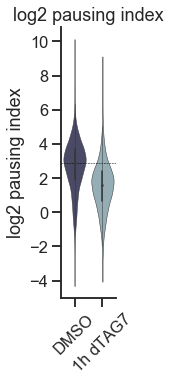

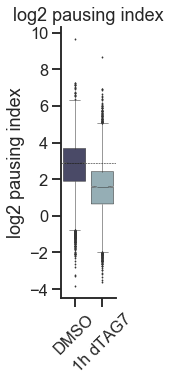

In [3]:
####################################
##### pausing index violinplot #####
####################################

plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize=(1,5))

plt.axhline(y=np.log2(plot_df.pausing_index_DMSO.median()), linestyle='dashed', linewidth=0.5, color="black")
ax = sns.violinplot(data=np.log2(plot_df.iloc[:,-2:]), linewidth=0.5, scale="width", saturation=1, palette="bone")

plt.title('log2 pausing index')
plt.xticks(rotation=45, ha="center")
ax.set_xticklabels(["DMSO", "1h dTAG7"])
plt.ylabel('log2 pausing index')

sns.despine()

#plt.savefig(plots_dir + 'pausing_and_readthrough_index\\log2_pausing-index_violinplot_DMSO_1hdTAG_merged_1x5.pdf', dpi=300)
#plt.savefig(plots_dir + 'pausing_and_readthrough_index\\log2_pausing-index_violinplot_DMSO_1hdTAG_merged_1x5.png', dpi=300)
plt.show()


####################################
##### pausing index boxplot #####
####################################

plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize=(1,5))

plt.axhline(y=np.log2(plot_df.pausing_index_DMSO.median()), linestyle='dashed', linewidth=0.5, color="black")
ax = sns.boxplot(data=np.log2(plot_df.iloc[:,-2:]), linewidth=0.5, fliersize=1, notch=True, saturation=1, palette="bone")

plt.title('log2 pausing index')
plt.xticks(rotation=45, ha="center")
ax.set_xticklabels(["DMSO", "1h dTAG7"])
plt.ylabel('log2 pausing index')

sns.despine()

#plt.savefig(plots_dir + 'pausing_and_readthrough_index\\log2_pausing-index_boxplot_DMSO_1hdTAG_merged_1x5.pdf', dpi=300)
#plt.savefig(plots_dir + 'pausing_and_readthrough_index\\log2_pausing-index_boxplot_DMSO_1hdTAG_merged_1x5.png', dpi=300)
plt.show()

In [227]:
##################################################
#### load in coverages for read-through index ####
##################################################
## first DMSO
DMSO_geneEnd_cov = pd.read_csv("S:\\lab_winter\\martin\\MED14_PRO-seq_final\\results\\MJ-19-14_DMSO_1h_merged\\refGene_coverage\\MJ-19-14_DMSO_1h_merged_gene_end_expressed_norm.cov", header=None, names=["chr", "start", "end", "gene_name", "RefSeq_ID", "strand", "norm_geneEnd_reads", "num_bases_covered", "annotation_length", "fraction_bases_covered"], index_col=3, sep="\t")
DMSO_termWindow_cov = pd.read_csv("S:\\lab_winter\\martin\\MED14_PRO-seq_final\\results\\MJ-19-14_DMSO_1h_merged\\refGene_coverage\\MJ-19-14_DMSO_1h_merged_termination_window_expressed_norm.cov", header=None, names=["chr", "start", "end", "gene_name", "RefSeq_ID", "strand", "norm_termWindow_reads", "num_bases_covered", "annotation_length", "fraction_bases_covered"], index_col=3, sep="\t")
DMSO_geneEnd_cov['norm_geneEnd_RPKM'] = DMSO_geneEnd_cov.norm_geneEnd_reads/(DMSO_geneEnd_cov.annotation_length/1000)
DMSO_termWindow_cov['norm_termWindow_RPKM'] = DMSO_termWindow_cov.norm_termWindow_reads/(DMSO_termWindow_cov.annotation_length/1000)

RI_DMSO_df = DMSO_geneEnd_cov[["start", "end", "RefSeq_ID", "strand", "norm_geneEnd_reads", "norm_geneEnd_RPKM"]]
RI_DMSO_df = RI_DMSO_df.join(DMSO_termWindow_cov.iloc[:,[5,9]])

RI_DMSO_df = RI_DMSO_df[RI_DMSO_df.norm_geneEnd_reads > float(RI_DMSO_df.norm_geneEnd_reads.quantile(q=0.1))]
RI_DMSO_df = RI_DMSO_df[RI_DMSO_df.norm_termWindow_reads > float(RI_DMSO_df.norm_termWindow_reads.quantile(q=0.1))]

RI_DMSO_df["readthrough_index_DMSO"] = RI_DMSO_df.norm_termWindow_RPKM / RI_DMSO_df.norm_geneEnd_RPKM

## now 1h dTAG7
dTAG_geneEnd_cov = pd.read_csv("S:\\lab_winter\\martin\\MED14_PRO-seq_final\\results\\MJ-19-14_dTAG7_1h_merged\\refGene_coverage\\MJ-19-14_dTAG7_1h_merged_gene_end_expressed_norm.cov", header=None, names=["chr", "start", "end", "gene_name", "RefSeq_ID", "strand", "norm_geneEnd_reads", "num_bases_covered", "annotation_length", "fraction_bases_covered"], index_col=3, sep="\t")
dTAG_termWindow_cov = pd.read_csv("S:\\lab_winter\\martin\\MED14_PRO-seq_final\\results\\MJ-19-14_dTAG7_1h_merged\\refGene_coverage\\MJ-19-14_dTAG7_1h_merged_termination_window_expressed_norm.cov", header=None, names=["chr", "start", "end", "gene_name", "RefSeq_ID", "strand", "norm_termWindow_reads", "num_bases_covered", "annotation_length", "fraction_bases_covered"], index_col=3, sep="\t")
dTAG_geneEnd_cov['norm_geneEnd_RPKM'] = dTAG_geneEnd_cov.norm_geneEnd_reads/(dTAG_geneEnd_cov.annotation_length/1000)
dTAG_termWindow_cov['norm_termWindow_RPKM'] = dTAG_termWindow_cov.norm_termWindow_reads/(dTAG_termWindow_cov.annotation_length/1000)

RI_dTAG_df = dTAG_geneEnd_cov[["start", "end", "RefSeq_ID", "strand", "norm_geneEnd_reads", "norm_geneEnd_RPKM"]]
RI_dTAG_df = RI_dTAG_df.join(dTAG_termWindow_cov.iloc[:,[5,9]])

RI_dTAG_df = RI_dTAG_df[RI_dTAG_df.norm_geneEnd_reads > float(RI_dTAG_df.norm_geneEnd_reads.quantile(q=0.1))]
RI_dTAG_df = RI_dTAG_df[RI_dTAG_df.norm_termWindow_reads > float(RI_dTAG_df.norm_termWindow_reads.quantile(q=0.1))]

RI_dTAG_df["readthrough_index_1h_dTAG7"] = RI_dTAG_df.norm_termWindow_RPKM / RI_dTAG_df.norm_geneEnd_RPKM

plot_df = RI_DMSO_df.join(RI_dTAG_df.iloc[:,-1:])


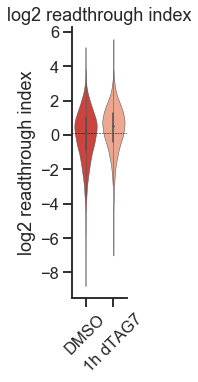

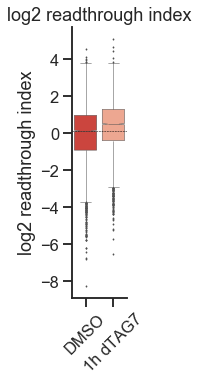

readthrough index 	 all_DMSO vs. all_1h_dTAG 	MannwhitneyuResult(statistic=12325871.5, pvalue=1.7786182126648751e-72)


In [233]:
########################################
##### readthrough index violinplot #####
########################################

plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize=(1,5))

plt.axhline(y=np.log2(plot_df.readthrough_index_DMSO.median()), linestyle='dashed', linewidth=0.5, color="black")
ax = sns.violinplot(data=np.log2(plot_df.iloc[:,-2:]), linewidth=0.5, scale="width", palette="Reds_r")

plt.title('log2 readthrough index')
plt.xticks(rotation=45, ha="center")
ax.set_xticklabels(["DMSO", "1h dTAG7"])
plt.ylabel('log2 readthrough index')

sns.despine()

#plt.savefig(plots_dir + 'pausing_and_readthrough_index\\log2_readthrough-index_violinplot_DMSO_1hdTAG_merged_1x5.pdf', dpi=300)
#plt.savefig(plots_dir + 'pausing_and_readthrough_index\\log2_readthrough-index_violinplot_DMSO_1hdTAG_merged_1x5.png', dpi=300)
plt.show()


#####################################
##### readthrough index boxplot #####
#####################################

plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize=(1,5))

plt.axhline(y=np.log2(plot_df.readthrough_index_DMSO.median()), linestyle='dashed', linewidth=0.5, color="black")
ax = sns.boxplot(data=np.log2(plot_df.iloc[:,-2:]), linewidth=0.5, fliersize=1, notch=True, palette="Reds_r")

plt.title('log2 readthrough index')
plt.xticks(rotation=45, ha="center")
ax.set_xticklabels(["DMSO", "1h dTAG7"])
plt.ylabel('log2 readthrough index')

sns.despine()

#plt.savefig(plots_dir + 'pausing_and_readthrough_index\\log2_readthrough-index_boxplot_DMSO_1hdTAG_merged_1x5.pdf', dpi=300)
#plt.savefig(plots_dir + 'pausing_and_readthrough_index\\log2_readthrough-index_boxplot_DMSO_1hdTAG_merged_1x5.png', dpi=300)
plt.show()

print "readthrough index \t all_DMSO vs. all_1h_dTAG \t", sc.stats.mannwhitneyu(np.log2(plot_df.readthrough_index_DMSO), np.log2(plot_df.readthrough_index_1h_dTAG7))


In [10]:
DMSO_genebody_cov["log2FC_dTAG_vs_DMSO"]= np.log2(dTAG_genebody_cov.norm_genebody_reads/DMSO_genebody_cov.norm_genebody_reads).dropna()

C:\Users\mjaeger\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log2
  """Entry point for launching an IPython kernel.


In [11]:
DMSO_genebody_cov.describe()

,start,end,norm_genebody_reads,num_bases_covered,annotation_length,fraction_bases_covered,norm_genebody_RPKM,log2FC_dTAG_vs_DMSO
count,9.438000e+03,9.438000e+03,9438.00000,9438.000000,9.438000e+03,9438.000000,9438.000000,9247.000000
mean,7.430187e+07,7.435213e+07,2021.66968,3438.978491,5.025519e+04,0.083777,57.902322,NaN
std,5.497296e+07,5.497759e+07,2964.67825,4618.390226,7.298966e+04,0.054610,110.728533,NaN
min,4.697800e+04,5.313200e+04,0.00000,0.000000,1.504000e+03,0.000000,0.000000,-inf
25%,3.244102e+07,3.248396e+07,434.12200,782.000000,1.066900e+04,0.050376,24.363800,-0.899452
50%,5.993886e+07,5.995734e+07,1142.20000,1967.500000,2.668650e+04,0.075087,40.237839,-0.658445
75%,1.096375e+08,1.096992e+08,2483.12500,4300.500000,6.019100e+04,0.105990,64.171977,-0.462213
max,2.489067e+08,2.489191e+08,64999.30000,83017.000000,1.213584e+06,0.556284,5936.218905,inf


In [14]:
MJ30_DMSO_genebody = pd.read_csv("S:\\lab_winter\\martin\\MED14_PRO-seq_final\\results\\MJ-19-30_DMSO_2h_merged\\refGene_coverage\\MJ-19-30_DMSO_2h_merged_genebody_expressed_norm.cov", header=None, names=["chr", "start", "end", "gene_name", "RefSeq_ID", "strand", "norm_genebody_reads", "num_bases_covered", "annotation_length", "fraction_bases_covered"], index_col=3, sep="\t")
MJ30_DMSO_genebody['norm_genebody_RPKM'] = MJ30_DMSO_genebody.norm_genebody_reads/(MJ30_DMSO_genebody.annotation_length/1000)

MJ30_dTAG_genebody = pd.read_csv("S:\\lab_winter\\martin\\MED14_PRO-seq_final\\results\\MJ-19-30_dTAG7_2h_merged\\refGene_coverage\\MJ-19-30_dTAG7_2h_merged_genebody_expressed_norm.cov", header=None, names=["chr", "start", "end", "gene_name", "RefSeq_ID", "strand", "norm_genebody_reads", "num_bases_covered", "annotation_length", "fraction_bases_covered"], index_col=3, sep="\t")
MJ30_dTAG_genebody['norm_genebody_RPKM'] = MJ30_dTAG_genebody.norm_genebody_reads/(MJ30_dTAG_genebody.annotation_length/1000)

MJ30_NVP2_genebody = pd.read_csv("S:\\lab_winter\\martin\\MED14_PRO-seq_final\\results\\MJ-19-30_NVP2_30min_merged\\refGene_coverage\\MJ-19-30_NVP2_30min_merged_genebody_expressed_norm.cov", header=None, names=["chr", "start", "end", "gene_name", "RefSeq_ID", "strand", "norm_genebody_reads", "num_bases_covered", "annotation_length", "fraction_bases_covered"], index_col=3, sep="\t")
MJ30_NVP2_genebody['norm_genebody_RPKM'] = MJ30_NVP2_genebody.norm_genebody_reads/(MJ30_NVP2_genebody.annotation_length/1000)

MJ30_combo_genebody = pd.read_csv("S:\\lab_winter\\martin\\MED14_PRO-seq_final\\results\\MJ-19-30_dTAG7_NPV2_combo_merged\\refGene_coverage\\MJ-19-30_dTAG7_NPV2_combo_merged_genebody_expressed_norm.cov", header=None, names=["chr", "start", "end", "gene_name", "RefSeq_ID", "strand", "norm_genebody_reads", "num_bases_covered", "annotation_length", "fraction_bases_covered"], index_col=3, sep="\t")
MJ30_combo_genebody['norm_genebody_RPKM'] = MJ30_combo_genebody.norm_genebody_reads/(MJ30_combo_genebody.annotation_length/1000)


MJ30_DMSO_genebody["log2FC_dTAG_vs_DMSO"]= np.log2(MJ30_dTAG_genebody.norm_genebody_reads/MJ30_DMSO_genebody.norm_genebody_reads).dropna()
MJ30_DMSO_genebody["log2FC_NVP2_vs_DMSO"]= np.log2(MJ30_NVP2_genebody.norm_genebody_reads/MJ30_DMSO_genebody.norm_genebody_reads).dropna()
MJ30_DMSO_genebody["log2FC_combo_vs_DMSO"]= np.log2(MJ30_combo_genebody.norm_genebody_reads/MJ30_DMSO_genebody.norm_genebody_reads).dropna()

MJ30_DMSO_genebody.describe()

C:\Users\mjaeger\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log2
  
C:\Users\mjaeger\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log2
  from ipykernel import kernelapp as app
C:\Users\mjaeger\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log2
  app.launch_new_instance()


,start,end,norm_genebody_reads,num_bases_covered,annotation_length,fraction_bases_covered,norm_genebody_RPKM,log2FC_dTAG_vs_DMSO,log2FC_NVP2_vs_DMSO,log2FC_combo_vs_DMSO
count,9.438000e+03,9.438000e+03,9438.000000,9438.000000,9.438000e+03,9438.000000,9438.000000,9249.000000,9234.000000,9245.000000
mean,7.430187e+07,7.435213e+07,2531.401181,3669.750053,5.025519e+04,0.092484,74.708332,NaN,NaN,NaN
std,5.497296e+07,5.497759e+07,3564.079911,4754.181749,7.298966e+04,0.059422,115.684553,NaN,NaN,NaN
min,4.697800e+04,5.313200e+04,0.000000,0.000000,1.504000e+03,0.000000,0.000000,-inf,-inf,-inf
25%,3.244102e+07,3.248396e+07,590.246000,897.000000,1.066900e+04,0.055403,31.626574,-1.464754,-2.430056,-2.848317
50%,5.993886e+07,5.995734e+07,1484.075000,2180.000000,2.668650e+04,0.083641,53.137855,-1.095471,-0.720508,-1.371996
75%,1.096375e+08,1.096992e+08,3126.325000,4607.750000,6.019100e+04,0.118108,84.822618,-0.800460,-0.043000,-0.718639
max,2.489067e+08,2.489191e+08,68283.700000,73885.000000,1.213584e+06,0.554891,4555.651741,inf,inf,inf


In [4]:
plot_df

,start,end,RefSeq_ID,strand,norm_TSS_reads,norm_TSS_RPKM,norm_genebody_reads,norm_genebody_RPKM,pausing_index_DMSO,pausing_index_1h_dTAG7
gene_name,,,,,,,,,,
NOC2L,959049,959349,NM_015658,-,93.22090,310.736333,878.657,60.194355,5.162217,1.678369
SDF4,1231817,1232117,NM_016547,-,157.43400,524.780000,889.070,60.645975,8.653171,4.274462
B3GALT6,1232198,1232498,NM_080605,+,166.85600,556.186667,285.117,124.396597,4.471076,0.758770
UBE2J2,1273604,1273904,NM_194458,-,146.52500,488.416667,1850.530,95.177185,5.131657,1.352580
INTS11,1324437,1324737,NM_017871,-,178.26000,594.200000,751.966,59.665635,9.958831,2.070518
CCNL2,1398092,1398392,NM_001350497,-,31.98270,106.609000,1007.330,83.030828,1.283969,0.916118
MRPL20,1407063,1407363,NM_017971,-,328.25700,1094.190000,677.339,137.726515,7.944658,2.755184
ATAD3B,1478064,1478364,NM_001317238,+,13.14020,43.800667,1367.820,77.761228,0.563271,0.403291
SSU72,1574632,1574932,NM_014188,-,199.58200,665.273333,6368.530,194.696729,3.416972,0.725885


AttributeError: 'module' object has no attribute '__version__'